In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 
import matplotlib.pyplot as plt
import argparse
import pandas as pd
import os 
from functools import partial
# compressors  Gzip, Snappy, Brotli, LZ4, Zstandard, BZ2, and LZMA
import gzip
import snappy
import brotli
import lz4
import zstandard as zstd
import bz2
import lzma
import time
import matplotlib
from pathos.multiprocessing import ProcessingPool as Pool
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from itertools import product

import sys
sys.setrecursionlimit(1000000)

#matplotlib.use('Qt5Agg')  # Change to a different backend

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Only for Jupyter notebooks


In [3]:
def recursive_count(string, substring, count=0):
    if substring in string:
        # replace first occurrence of substring with empty string
        string = string.replace(substring, "", 1)
        return recursive_count(string, substring, count+1)
    return count

In [4]:
def recursive_count(string, substring, start=0, count=0):
    index = string.find(substring, start)
    if index != -1:
        return recursive_count(string, substring, index + len(substring), count + 1)
    return count

In [5]:
def generate_combinations(sequence, length):
    """
    Generates all combinations of a given sequence with a specified length.

    :param sequence: The list of elements to combine.
    :param length: The length of each combination.
    :return: A list of combinations.
    """
    return [''.join(combination) for combination in product(sequence, repeat=length)]


In [6]:
string = 'CTGCATGCTGCTGCTGCTG'
substring = 'CTGCTG'
print(recursive_count(string, substring))

2


In [7]:
# Read the data files
chimp_dna = pd.read_table('chimpanzee.txt') # read the chimpanzee data
human_dna = pd.read_table('human.txt') # read the human data
dog_dna = pd.read_table('dog.txt') # read the dog data

In [8]:
# number of sequences in each class of human dna
print('Number of sequences in each class of human dna')
print(human_dna['class'].value_counts())

Number of sequences in each class of human dna
class
6    1343
4     711
3     672
1     534
0     531
2     349
5     240
Name: count, dtype: int64


In [9]:
nucleotides = ['A', 'C', 'G', 'T']
# create comnbinations of nucleotides
nucleotide_combinations = [a + b  + c + d + e + f for a in nucleotides for b in nucleotides for c in nucleotides for d in nucleotides for e in nucleotides for f in nucleotides]
#nucleotide_combinations = [a + b  + c + d + e for a in nucleotides for b in nucleotides for c in nucleotides for d in nucleotides for e in nucleotides]
#nucleotide_combinations = [a + b  + c + d for a in nucleotides for b in nucleotides for c in nucleotides for d in nucleotides]
#nucleotide_combinations = [a + b  + c for a in nucleotides for b in nucleotides for c in nucleotides]
#nucleotide_combinations = [a + b  for a in nucleotides for b in nucleotides]
#nucleotide_combinations = [a  for a in nucleotides]

nucleotide_combinations
nucleotides = nucleotide_combinations

['A', 'C', 'G', 'T']
Class 6: [405682, 411092, 390115, 308520]
['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT', 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT']
Class 6: [88100, 86099, 130259, 75012, 129939, 100149, 51982, 100973, 115085, 107221, 84486, 64497, 46392, 89556, 104544, 54189]
['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT']
Class 6: [24324, 22367, 37080, 20449, 27096, 27486, 10410, 19661, 37467, 37110, 30723, 22231, 10850, 19825, 27724, 15971, 31136, 24814, 50412, 22063, 41093, 26086, 17426, 32500, 12345, 14127, 16982, 7692, 13524, 27819, 37263, 20752, 37451, 23157, 31587, 20675, 3

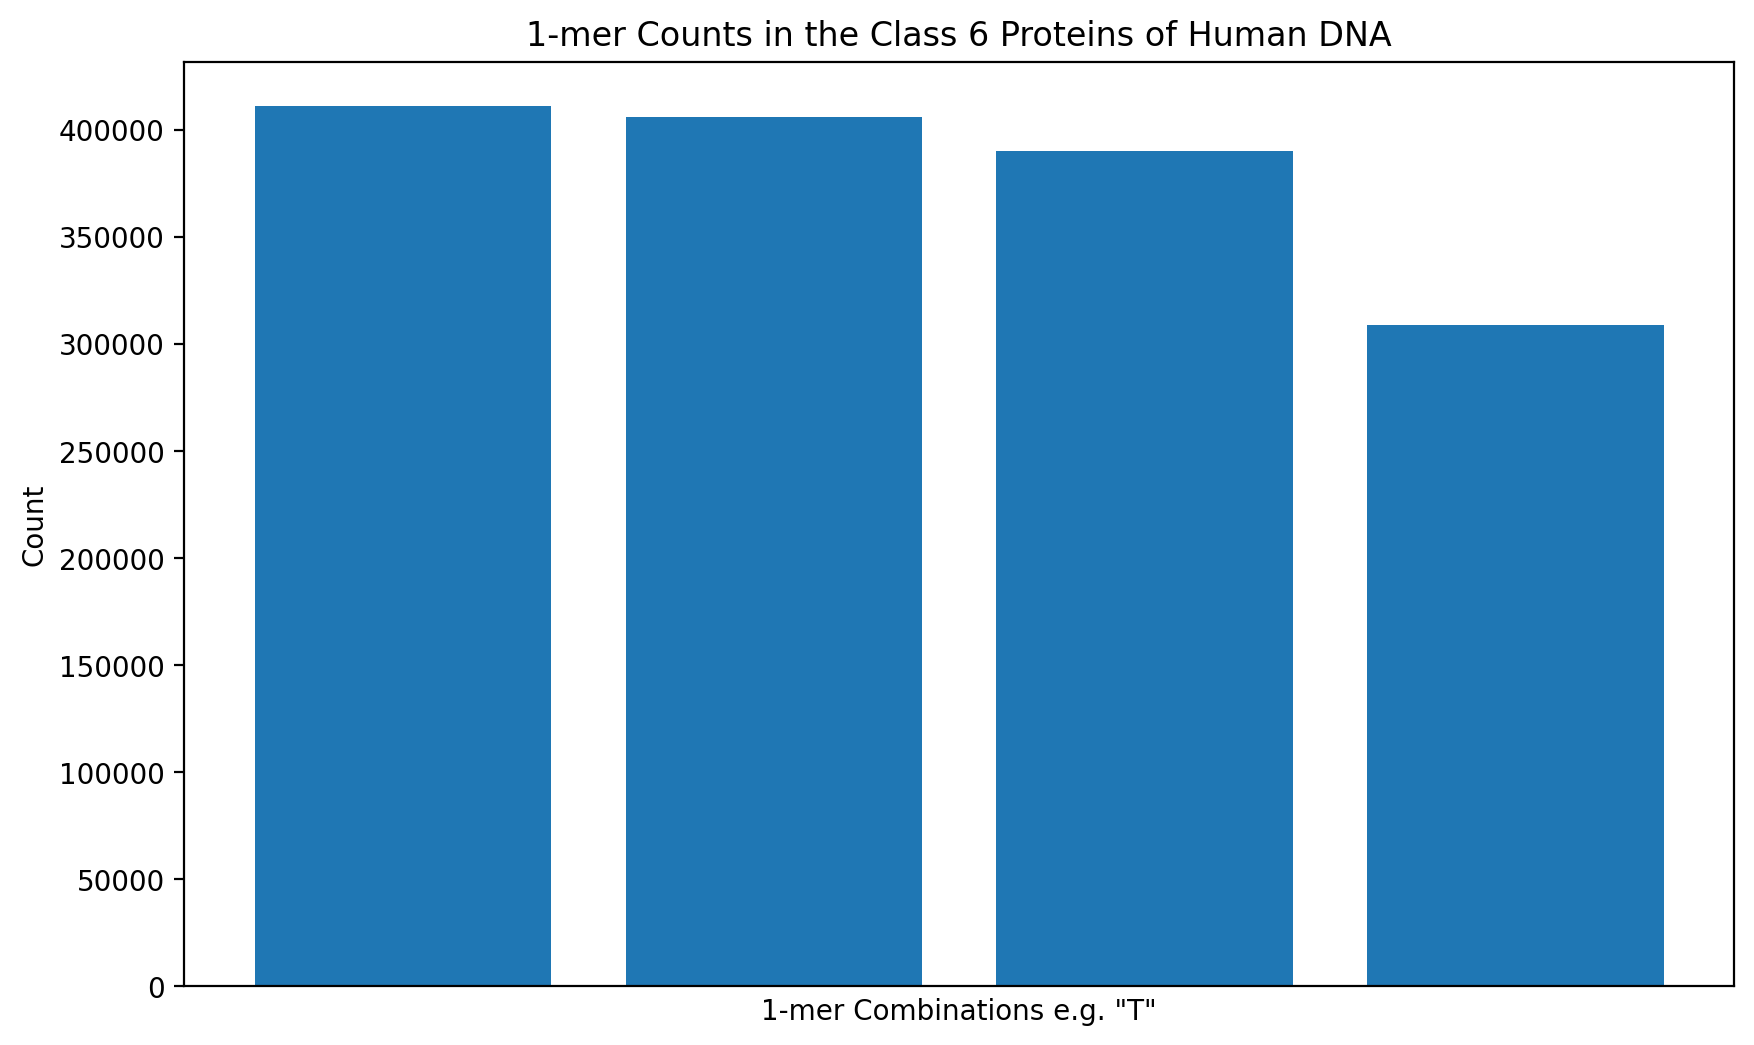

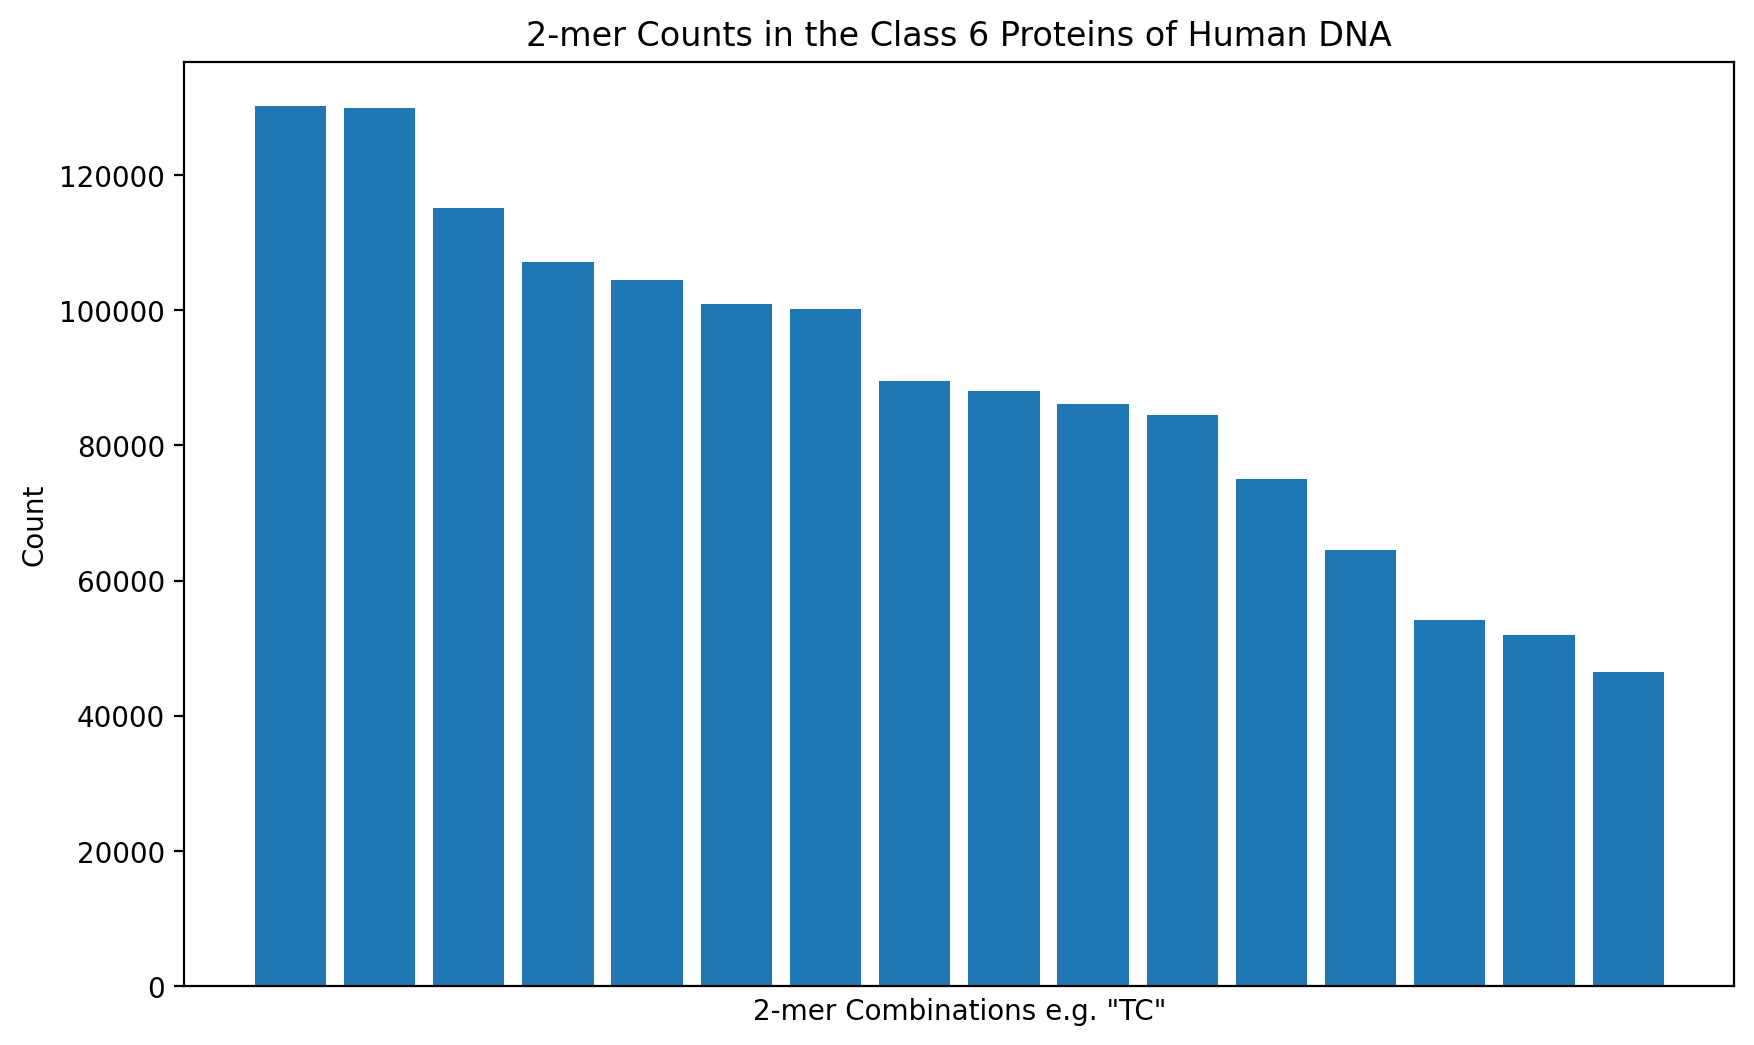

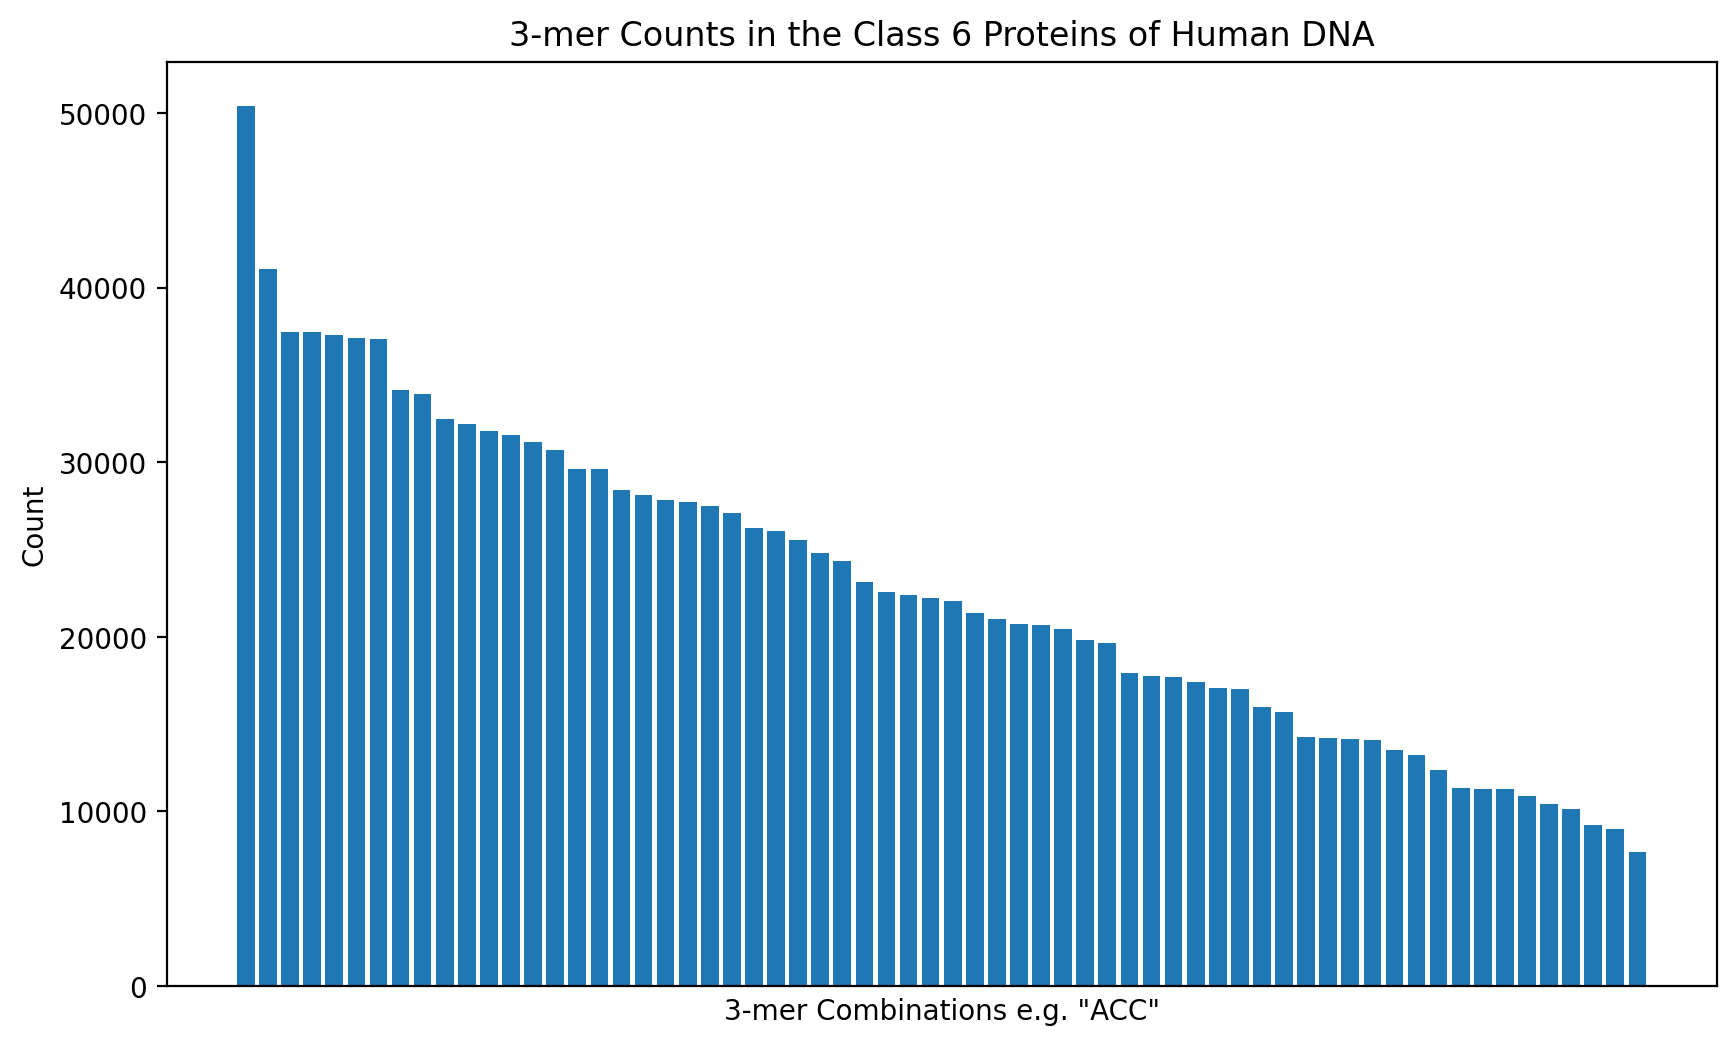

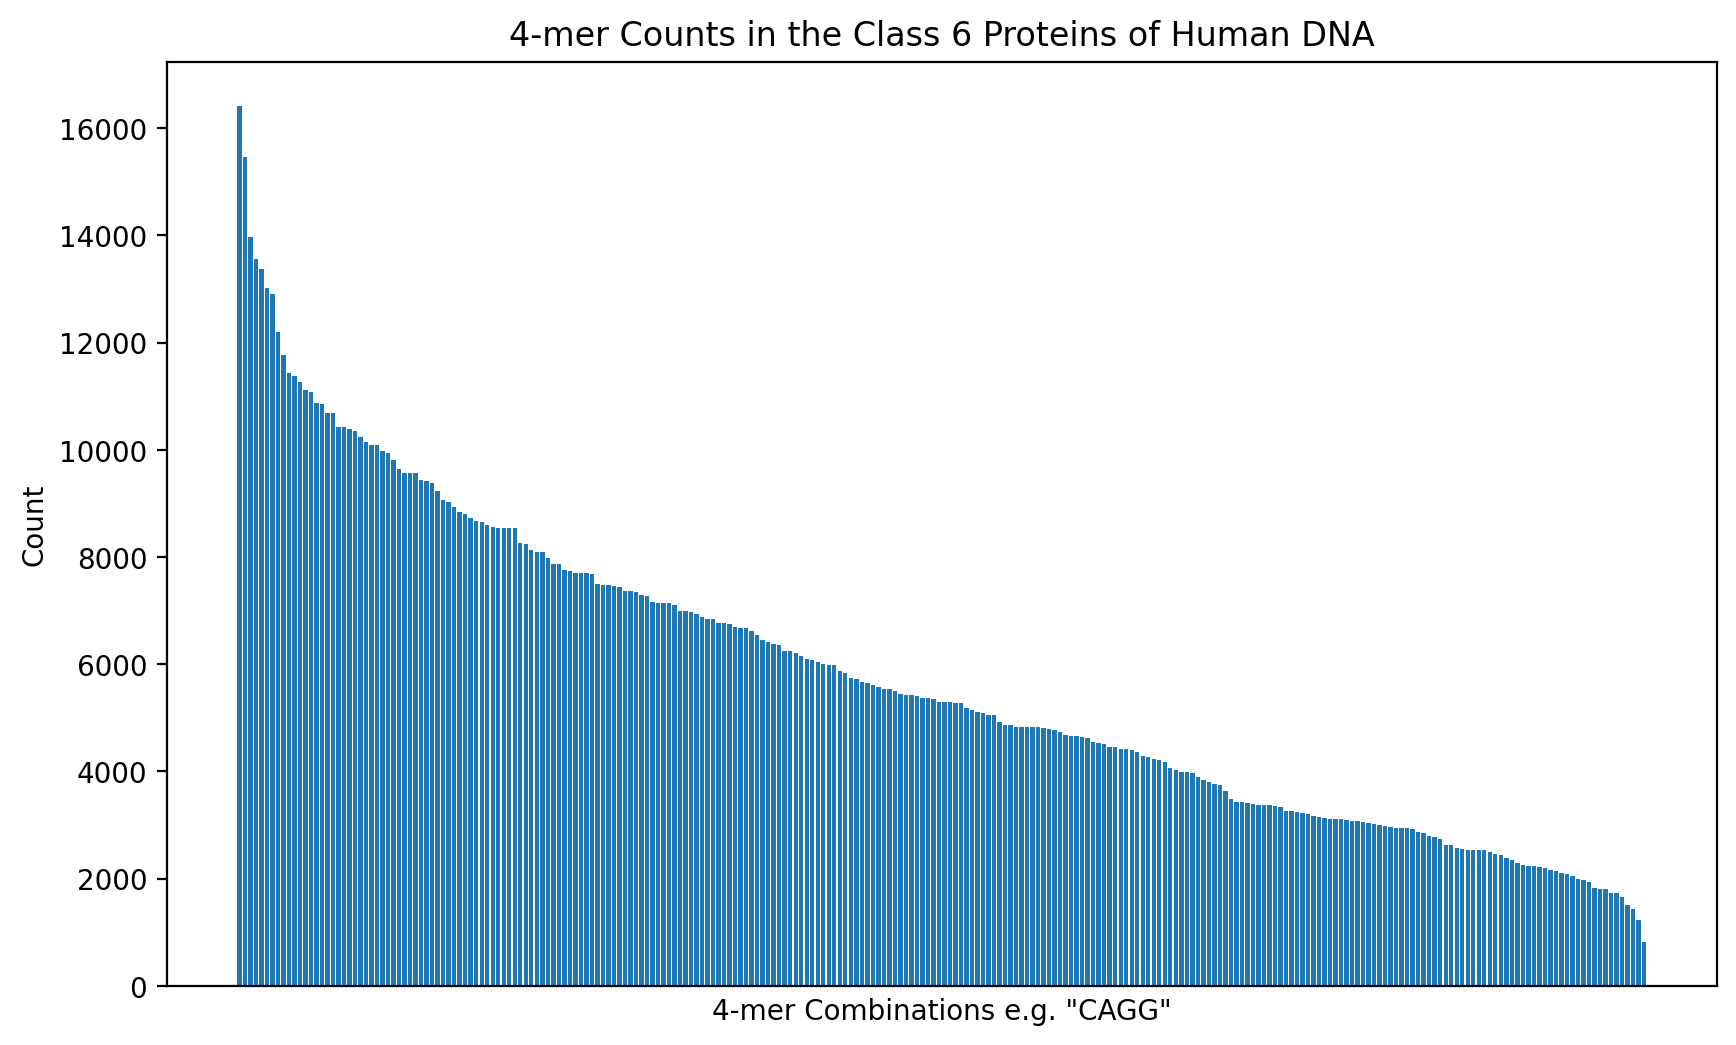

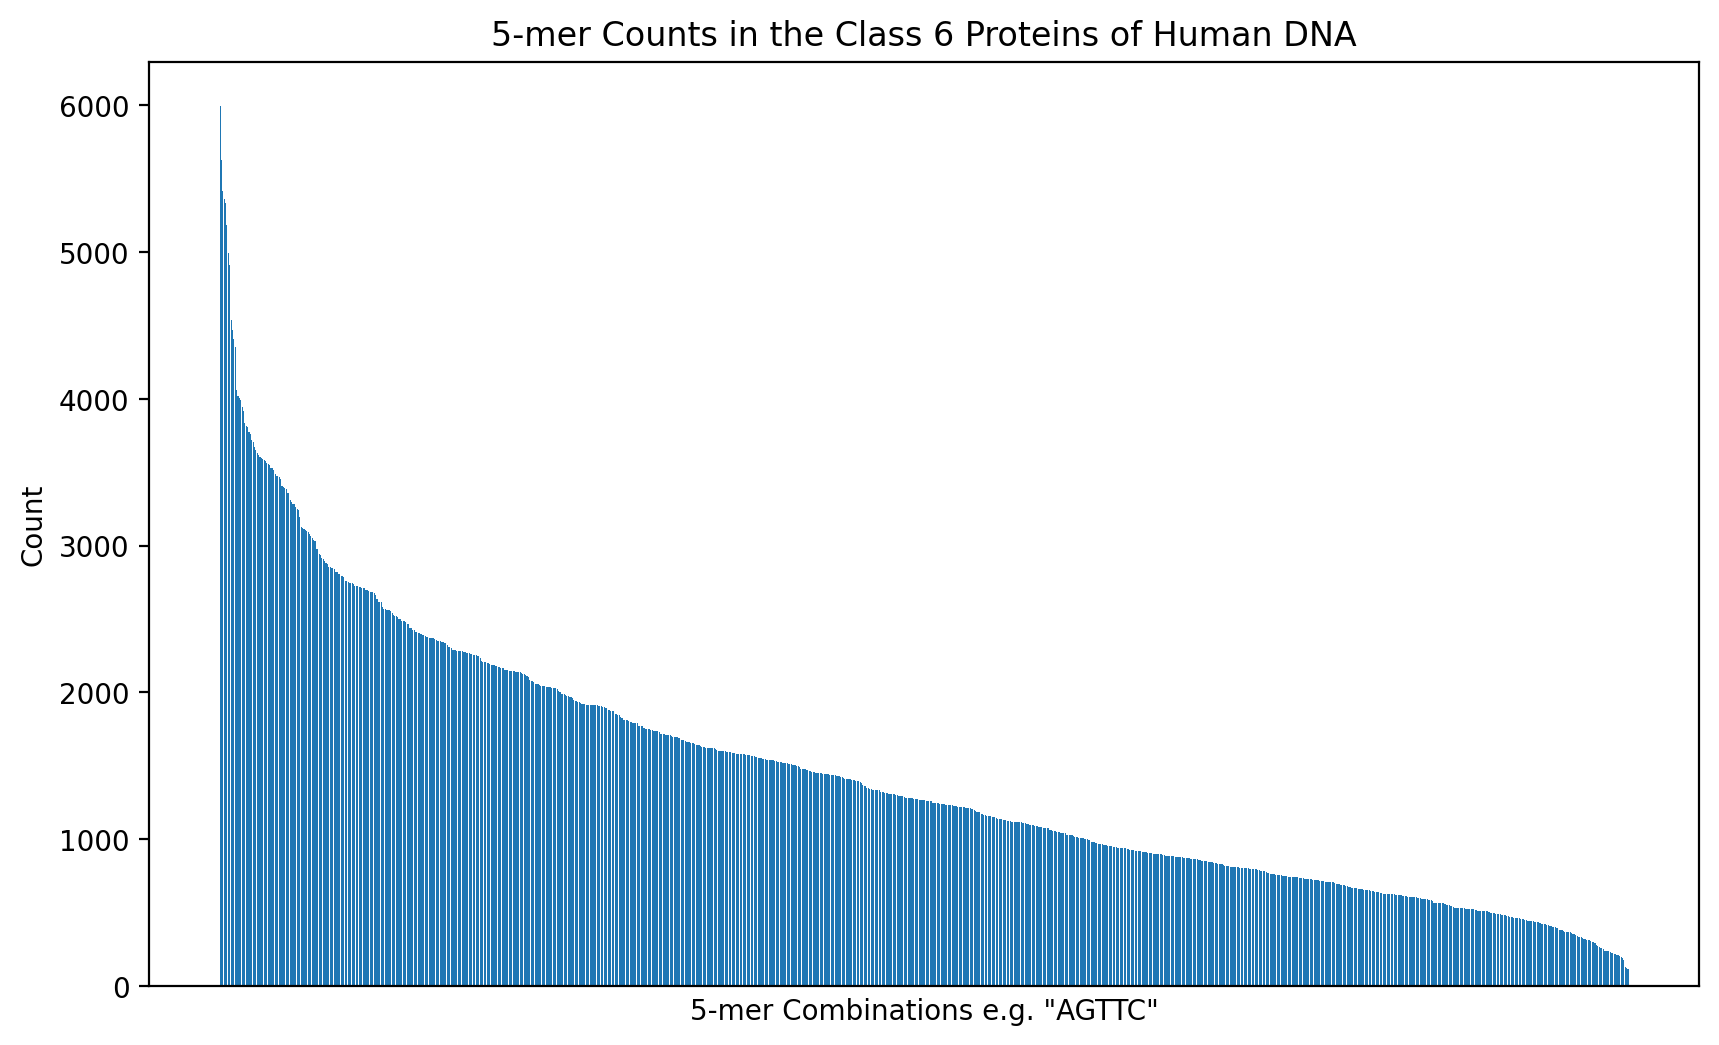

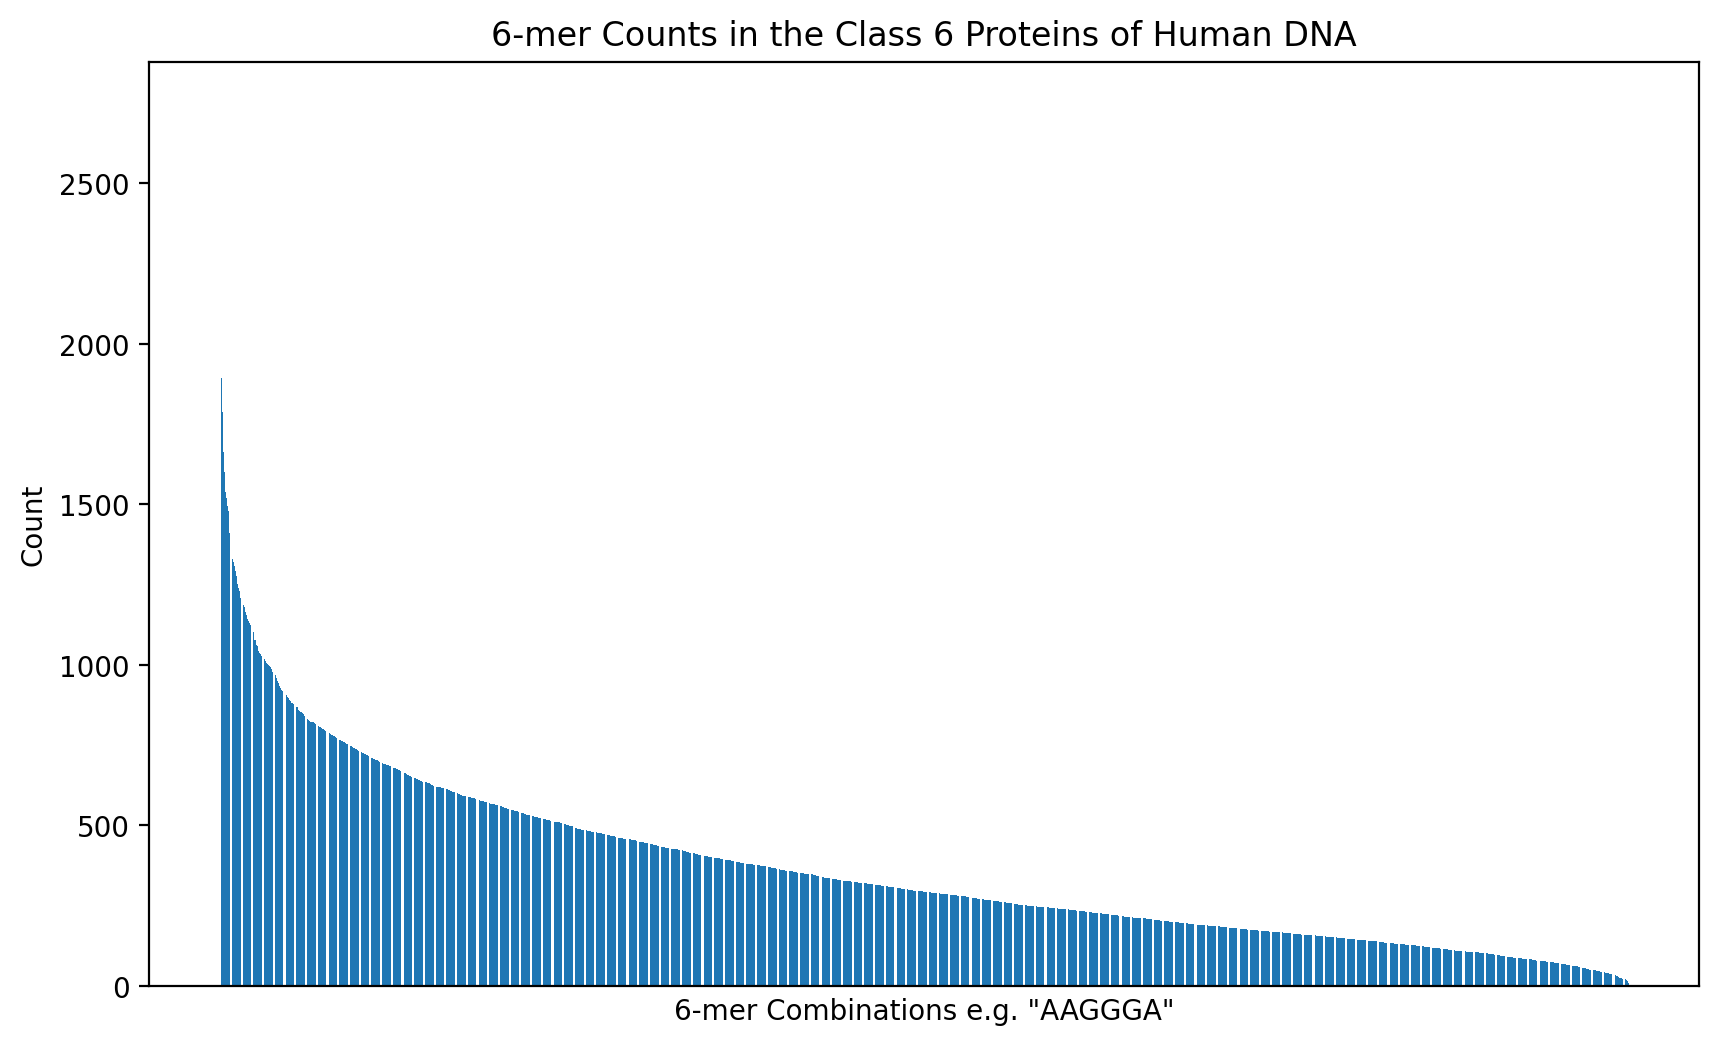

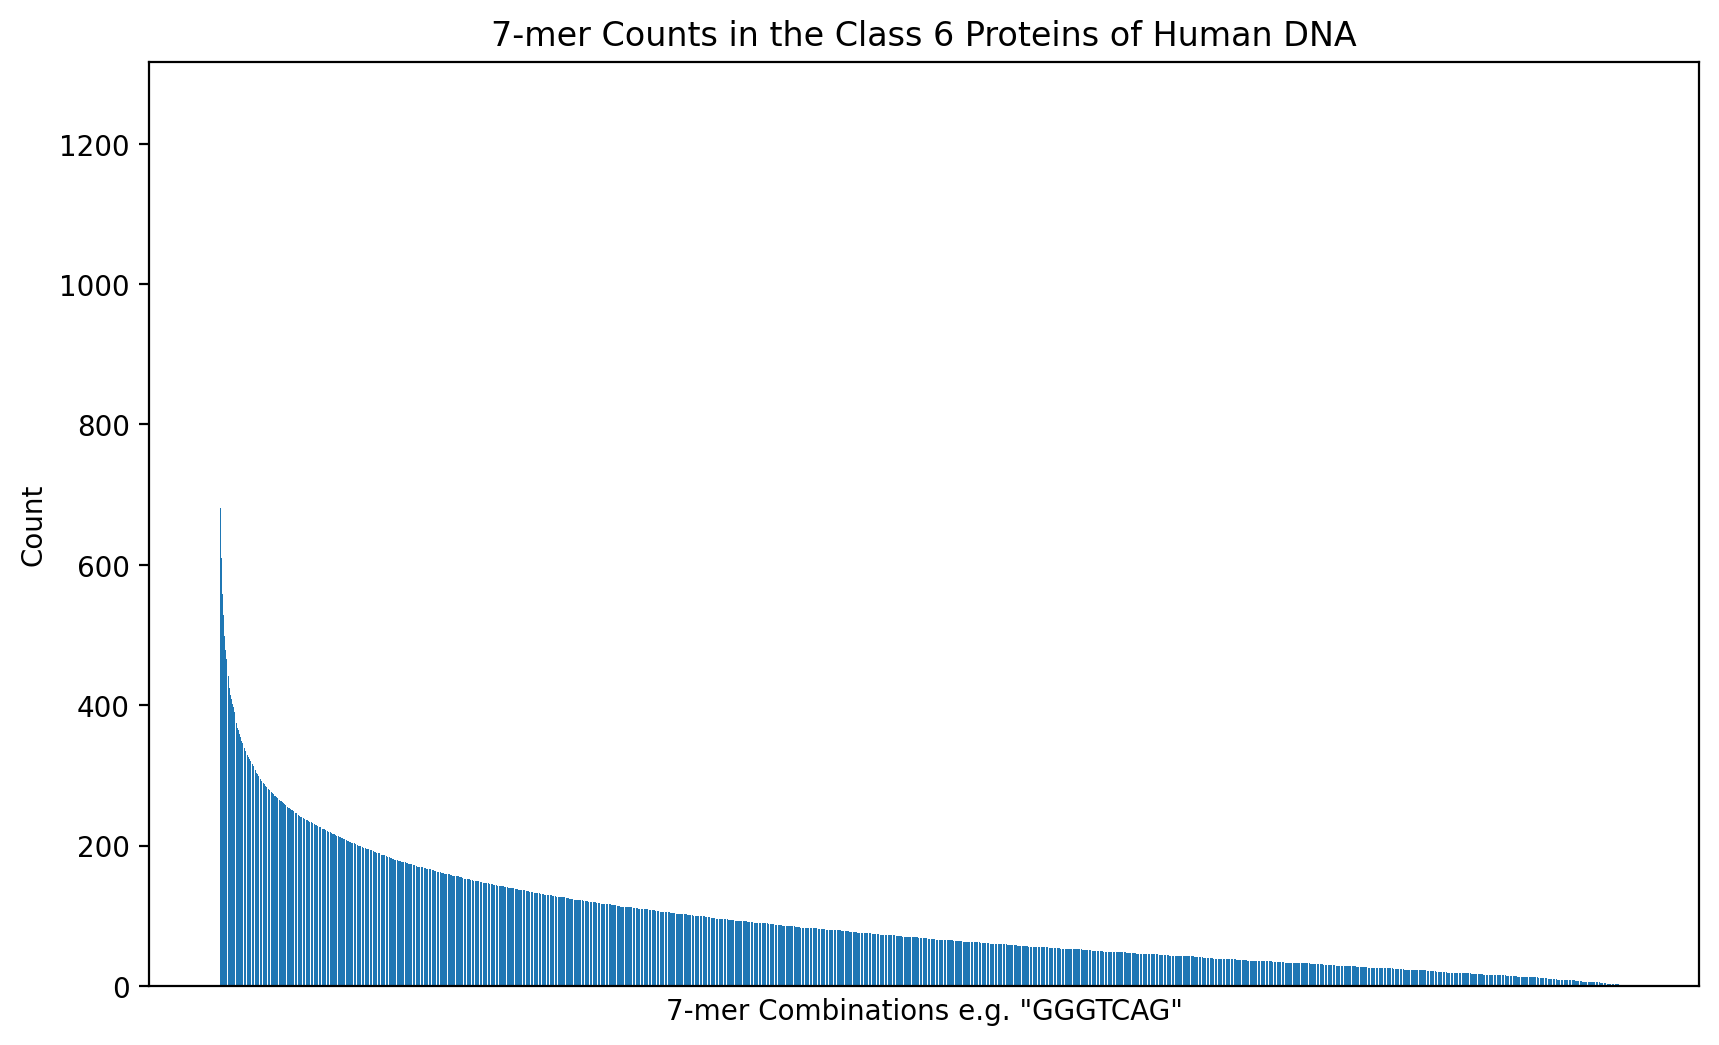

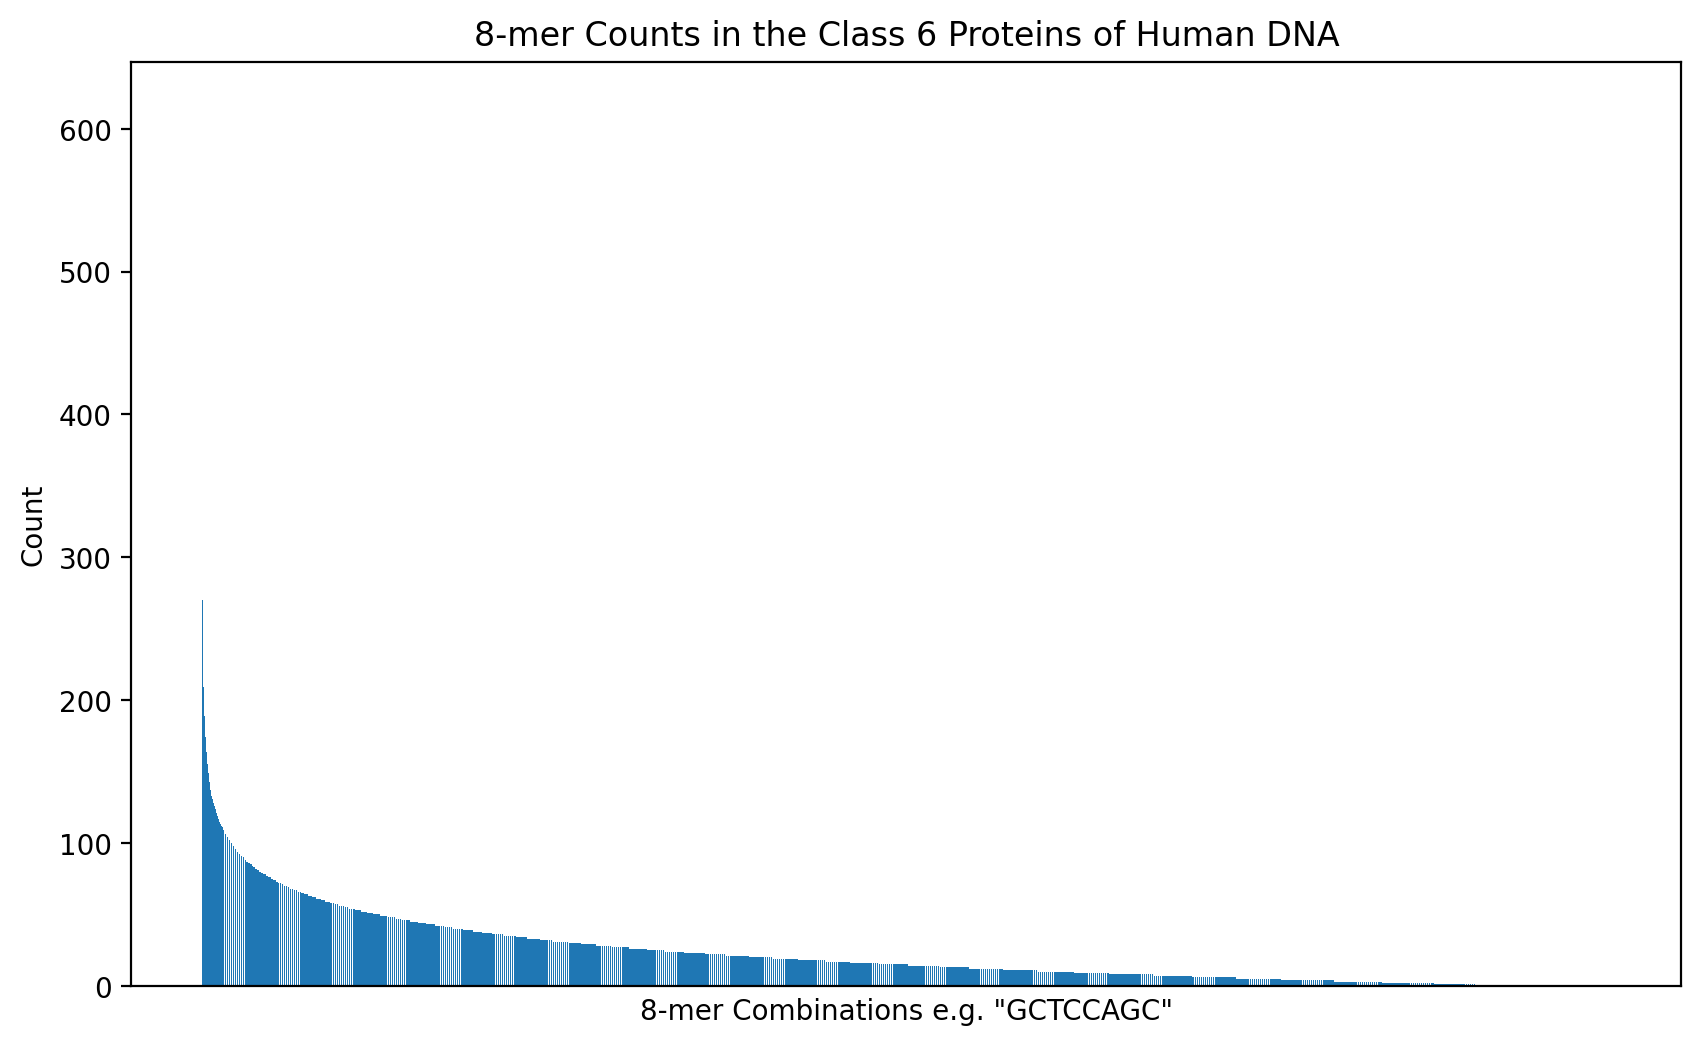

In [11]:
class_ = 6

for k in range(1, 9):
    nucleotides = ['A', 'C', 'G', 'T']
    combinations = generate_combinations(nucleotides, k)  # Generate combinations of length 6
    print(combinations)
    # join the sequences together to form one long sequence
    sequence = ''.join(human_dna[human_dna['class'] == class_]['sequence'])
    # count the number of each nucleotide in the sequence
    sequence_count = [recursive_count(sequence,combination) for combination in combinations]
    # print sequence counts
    # sort the nucleotide counts in descending order
    sequence_count_ = sorted(zip(combinations, sequence_count), key=lambda x: x[1], reverse=True)
    # create a dataframe of the counts
    sequence_count_df = pd.DataFrame(sequence_count_, columns=['combination', 'count'])
    # save the dataframe to a csv file
    sequence_count_df.to_csv('dataset/human_class_{}_{}_mer_counts.csv'.format(class_, k), index=False)
    print('Class {}: {}'.format(class_, sequence_count))
    #plot the nucleotide counts
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sequence_count_)), [count for _, count in sequence_count_], align='center',antialiased=True)
    # choose a random sample from the combinations array
    sample = np.random.choice(combinations, 1)
    plt.xlabel('{}-mer Combinations e.g. "{}"'.format(k,sample[0]))
    plt.ylabel('Count')
    # remove the ticks on the x-axis
    plt.xticks([])
    plt.title('{}-mer Counts in the Class {} Proteins of Human DNA'.format(k, class_))
    #save the plot
    plt.savefig('dataset/human_class_{}_{}_mer_counts.png'.format(class_, k), dpi=300)  # Save plot with higher DPI
    plt.savefig('dataset/human_class_{}_{}_mer_counts.svg'.format(class_, k))